<a href="https://colab.research.google.com/github/SaiVishalSK/Chat-GPT-analysis-/blob/main/Copy_of_DA_201_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from textblob import TextBlob

**Reading the CSV File for Chat GPT Analysis **

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chatgpt_reviews.csv", header=0)
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


**Data Cleaning  Extra Spaces and Sting to Lower Case for Column Head **

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')

**Finding out the Missing Values **

In [ ]:
df.isnull().sum()

,0
review_id,0
review,6
ratings,0
review_date,0


In [ ]:
df['review'] = df['review'].fillna("")
df.isnull().sum()

,0
review_id,0
review,0
ratings,0
review_date,0


**RATING ANALYSIS**

In [ ]:
rating_counts = df['ratings'].value_counts().sort_index()
avg_rating = df['ratings'].mean()
min_rating = df['ratings'].min()
max_rating = df['ratings'].max()
print(rating_counts)
print('Average Rating:', avg_rating)


ratings
1     12083
2      3375
3      8157
4     22897
5    150215
Name: count, dtype: int64
Average Rating: 4.50353535610262


**Chart for Rating Distribution **

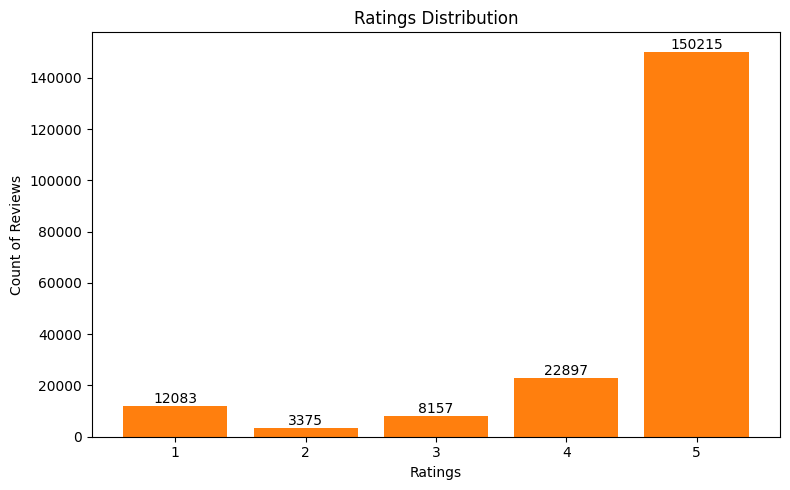

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(rating_counts.index.astype(str), rating_counts.values)
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )


plt.xlabel("Ratings")
plt.ylabel("Count of Reviews")
plt.title("Ratings Distribution")
plt.tight_layout()
plt.show()

Rating Distribution Percentage

In [ ]:
((df['ratings'].value_counts(normalize=True) * 100).round(2)).astype(str) + '%'

,proportion
ratings,
5,76.36%
4,11.64%
1,6.14%
3,4.15%
2,1.72%


**Monthly Trend on Average Ratings **

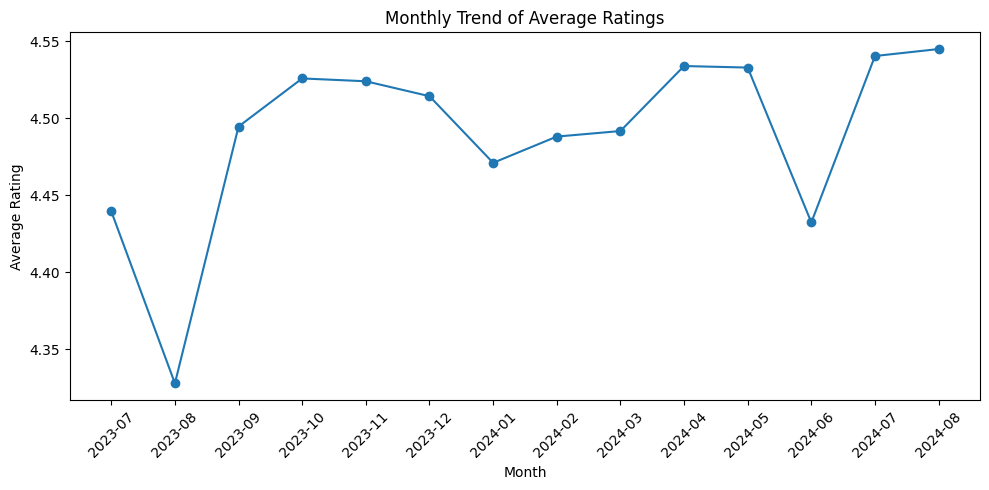

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')


df['year_month'] = df['review_date'].dt.to_period('M').astype(str)

# Group by month
monthly_ratings = df.groupby('year_month')['ratings'].mean()

# Plot monthly trend
plt.figure(figsize=(10,5))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.title("Monthly Trend of Average Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1 Star Review Analysis **

In [ ]:
df_1star = df[df['ratings'] == 1]


one_star_count = (df['ratings'] == 1).sum()

text = " ".join(df_1star['review'].astype(str).tolist()).lower()


text = re.sub(r'[^a-z\s]', ' ', text)
words = text.split()

negative_keywords = [
    "bad","worst","error","issue","issues","problem","problems","hate",
    "slow","crash","crashes","broken","bug","bugs","lag","laggy",
    "not","cant","wont","doesnt","failed","fail","poor"
]


word_counts = Counter(words)


unique_negative = [w for w, c in word_counts.items() if c == 1 and w in negative_keywords]

if len(unique_negative) < 5:
    top_negative = [(w, word_counts[w]) for w in negative_keywords if w in word_counts]
    top_negative = sorted(top_negative, key=lambda x: x[1], reverse=True)[:5]
else:
    top_negative = [(w, 1) for w in unique_negative[:5]]

df_negative_table = pd.DataFrame({
    "Rank": range(1, len(top_negative)+1),
    "Negative Word": [w for w, c in top_negative],
    "Count": [c for w, c in top_negative]
})

df_negative_table

,Rank,Negative Word,Count
0,1,not,2855
1,2,error,705
2,3,bad,633
3,4,worst,334
4,5,problem,299


**Top 5 Negatice words in 1 Star Review Ratings**

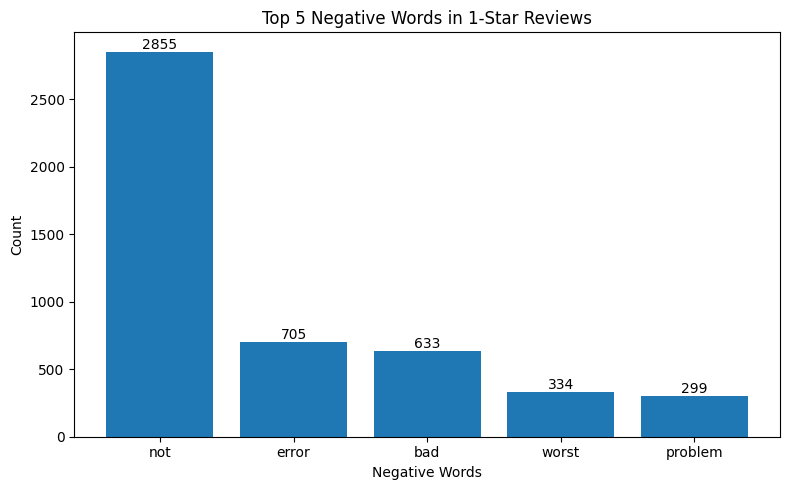

In [ ]:


# Top 5 negative words and counts
words = ["not", "error", "bad", "worst", "problem"]
counts = [2855, 705, 633, 334, 299]

plt.figure(figsize=(8,5))
bars = plt.bar(words, counts)

# Add numbers on top
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )

plt.xlabel("Negative Words")
plt.ylabel("Count")
plt.title("Top 5 Negative Words in 1-Star Reviews")
plt.tight_layout()
plt.show()


**Sentiment analysis **

In [ ]:
df['clean_review'] = df['review'].astype(str)

# Sentiment columns
df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Summary sentiment results
sentiment_summary = df[['polarity', 'subjectivity']].describe()
sentiment_summary


,polarity,subjectivity
count,196727.000000,196727.000000
mean,0.446714,0.516439
std,0.376533,0.339389
min,-1.000000,0.000000
25%,0.100000,0.300000
50%,0.500000,0.600000
75%,0.700000,0.780000
max,1.000000,1.000000


**Polarity Distribuition of All Reveiws **

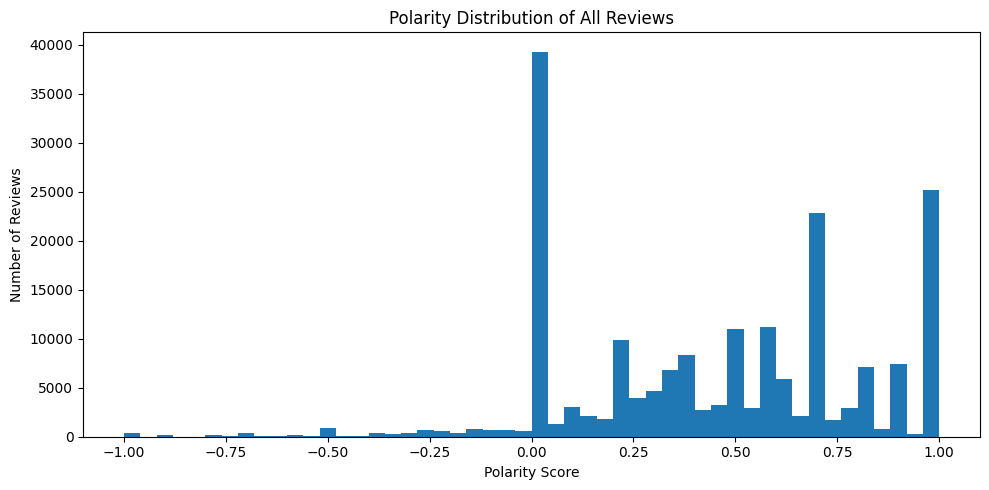

In [ ]:
df['clean_review'] = df['review'].astype(str)
df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot Polarity Distribution
plt.figure(figsize=(10,5))
plt.hist(df['polarity'], bins=50)
plt.xlabel("Polarity Score")
plt.ylabel("Number of Reviews")
plt.title("Polarity Distribution of All Reviews")
plt.tight_layout()
plt.show()

1) Most reviews have polarity between 0.2 and 1.0

2) A huge spike around 0.0

3) Very few reviews are negative

4) Strong positive peak at 1.0

**Sentiment Distribution (Positive vs Neutral vs Negative)**

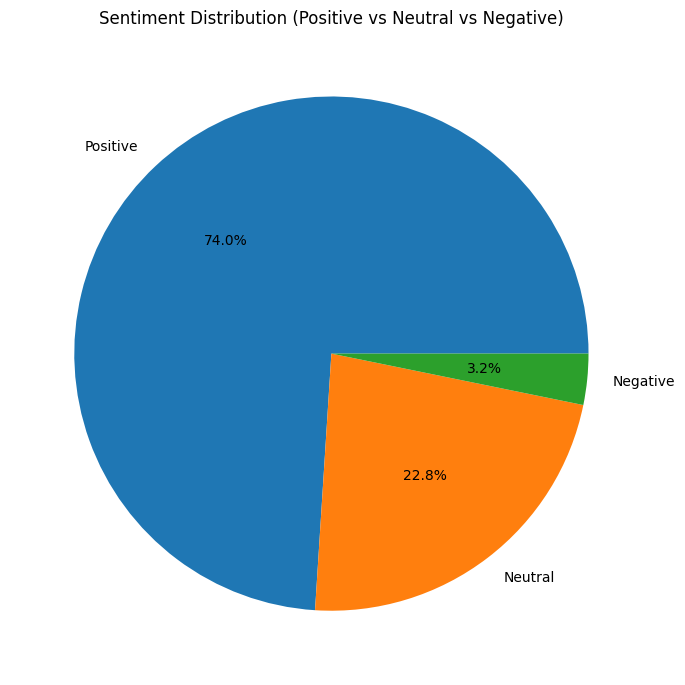

In [ ]:
df['clean_review'] = df['review'].astype(str)
df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)


def classify(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(classify)

sentiment_counts = df['sentiment'].value_counts()


plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution (Positive vs Neutral vs Negative)")
plt.tight_layout()
plt.show()